# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [61]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [62]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [63]:
#Code to randomly generate samples
#import random
#n_samples = len(data)
#indices = random.sample(xrange(n_samples), 3)


# TODO: Select three indices of your choice you wish to sample from the dataset
#193, 287, 290 look like good different samples after a few times of generating random samples
indices = [193, 287, 290]
print (indices)
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

[193, 287, 290]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,180,3485,20292,959,5618,666
1,15354,2102,2828,8366,386,1027
2,2708,2160,2642,502,965,1522


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

1) (193) Large Retailer: This is due to the sample customer purchasing within the top 25% percentiles of both the grocery and Detergents_Paper categories. These categories I thnk would encompass most common household items. The high spending cost may indicative of the expenses needed to keep a stable in store inventory for a larger retailer.
2) (287) Meat/Butcher's Shop with a small convenience store: This customer sample spends the most on Fresh and Frozen products. With Fresh purchase cost being between 50-75 percentile, and Frozen being within the top 25 percentile. Although not told exactly what products fall into each category I think this sample could potentially be a small Butcher's shop. The shop could be spending a lot on fresh meat to cut, and also be stocking precut / frozen items in a small convenience store. The below mean and median milk purchase cost, below mean and median grocery purchase cost, below mean and median Detergents_paper product purchase cost, and below mean Delicatessen purchase cost may be indicative of the small scale of the store.
3) (290) Deli: This customer spent within the bottom 25 percentile on Fresh and Frozen items, between the 25-50 percentile on Milk and Grocery items, and above the 50 percentile in the Detergents_paper and Delicatessen categories. Based on this it seems like this establishment may specialise in creating/packing Delicatessen foods. Although spending on Fresh, MIlk, and Grocery items was lower to a majority of the dataset, it did make up most of the spending of this sample. This low spending could be due to the small scale of this deli type of store. 

I chose to look at percentiles more than maens and standard deviations since most categories seemed to have a very wide ranges with means not  very close to the median. This may indicate that the distributions are skewed.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [64]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'], axis = 1)
print "Wholesale customers dataset has {} samples with {} features each.".format(*new_data.shape)
target = data['Delicatessen']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print (score)

Wholesale customers dataset has 440 samples with 5 features each.
-11.6636871594


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

I tried to predict the Delicatessen feature. The reported R^2 score was -11.6636871594. Since the other 5 features were not able to build a regression model that could predict the Delicatessen feature (indicated by a negative R^2 score), the feature would be necessary for identiying spending habits. Removing the Delicatessen feature may thus result in ignoring important information in spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

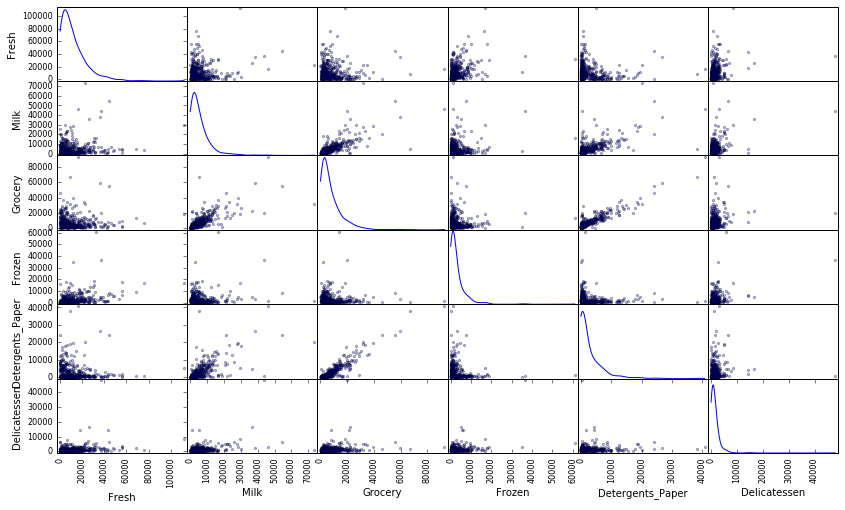

In [65]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Here is a list of correlations I can see from the scatter matrix. 

Fresh is negatively correlated with Milk, Grocery, and Detergents_Paper spending.
Milk is positvely correlated with Grocery and Detergents_Paper spending.
Grocery is negative correlated with Frozen spending. Grocery is positively correlated with Detergents_Paper spending.
Frozen looka slightly negatively correlated with Detergents_Paper, and slightly negatively correlated with Milk.

Delicatessen looks like there are very slight to no correlations with the other features. A majority of the points for each Delicatessen scatter plot could be fit to almost a horizontal line. Thus an increase or decrase in any of the other 5 categories of spending would not predict a significant change in Delicatessen features spending. This is in agreement with my previous result of not being able to predict Delicatessen spending shown by a negative R^2 score. Due to this inability to model Delicatessen spending it should be a feature we should be very careful leaving out in future exploration.

All of the featurs distributions are skewed with long tails in the direction of increased spending. This in addition to the features having some datapoints far from the main cluster of data seems to indicate the presence of outliers.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

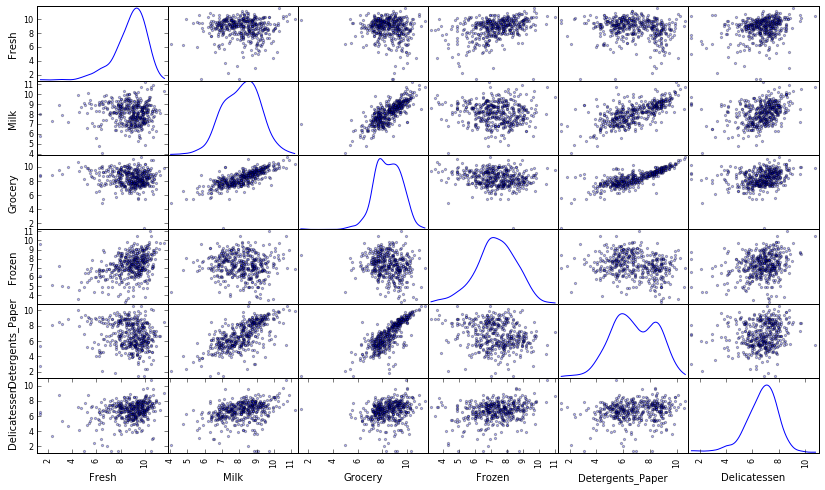

In [66]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x+1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x+1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [67]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
1,9.639196,7.651120,7.947679,9.032051,5.958425,6.935370
2,7.904335,7.678326,7.879670,6.220590,6.873164,7.328437


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [68]:
import numpy as np
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    # Display the outliers
    print "Q1 for this feature '{}':".format(Q1)
    print "Q3 this the feature '{}':".format(Q3)


    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Q1 for this feature '8.04837837647':
Q3 this the feature '9.73712299987':
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Q1 for this feature '7.33563334393':
Q3 this the feature '8.88061915645':
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Q1 for this feature '7.67508056293':
Q3 this the feature '9.27394751912':
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Q1 for this feature '6.61102411993':
Q3 this the feature '8.17617739875':
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Q1 for this feature '5.55198870992':
Q3 this the feature '8.27459554655':
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Q1 for this feature '6.01432116613':
Q3 this the feature '7.50727765156':
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** The following datapoints are outliers for more than one feature: 65, 66, 75, 128, and 154.

I will not remove any outliers in my analysis. This is because I believe different establishments may specialize in delivering products/services that would require them to have significantly different spending in one or more of the 6 categories relative to other establishments. Additionally there is no information to say that these are outliers due to methods of data collection or receiving misinformation.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

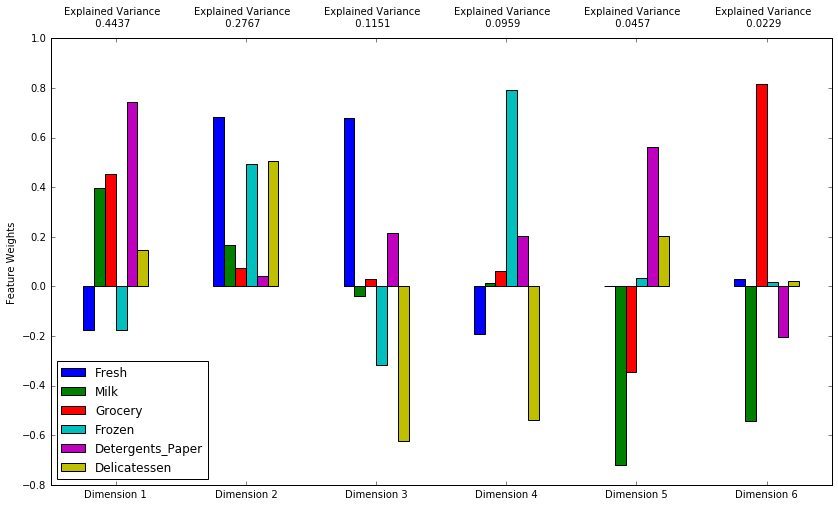

In [69]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**The total explained variance of the first two principal components is 0.7204. The total explained variance of the first four principal components is 0.9314. 

Since each PCA component can be thought of as a linear combination of the original 6 featuress, I can try to make some observations about consumer spending based on how the original features are weighted in each component. 

PCA Component 1 will be heavily impacted by Detergents_Paper, Grocery, and Milk spending. These features are what I would consider to be what a retailer would spend most on. Thus this projection in my intrepretation could represent a samples "Retail Goods Spending Score". 

PCA Componenet 2 is heavily weighted by Fresh, Frozen, and Delicatessen spending. So customers with large projections in this dimmension look like they spend a lot on food. The Delicatessen spending in conjunction with frozen and fresh spending makes me think customers with large projections in this dimmension service food. Thus this projection in my intrepreatation could represent a samples "Food Servicing Goods Spending Score."

PCA Component 3 is positvely weighted by Fresh and Detergents_Paper spending, and negatively weighted by Delicatessen and Frozen spending. Customers with large projections in this dimmension could be thought as an establishment such as a Farmer's Market where the products are mostly fresh, and not usually prepared into actual meals. I will intrepret this dimmension to be something like a "Local Goods Spending Score."

PCA Component 4 is positvely weighted by Fozen, Detergents_Paper spending, and negatively weighted by Delicatessen and Fresh spending. I would think a large projection in this component could indicate an establishment having properties similar to something like a convenience store. So I will intrepret this dimmension as a samples "Convenience Goods Spending Score."

Note: By large projection I mean a large positive value in a given dimmension.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [70]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.7276,-2.5245,-1.7254,0.8954,0.4523,0.6976
1,-1.4524,1.4542,-0.2694,0.8447,0.1545,0.0832
2,0.0606,-0.8790,-0.6141,-1.0755,0.6562,-0.2632


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [71]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [72]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.7276,-2.5245
1,-1.4524,1.4542
2,0.0606,-0.8790


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

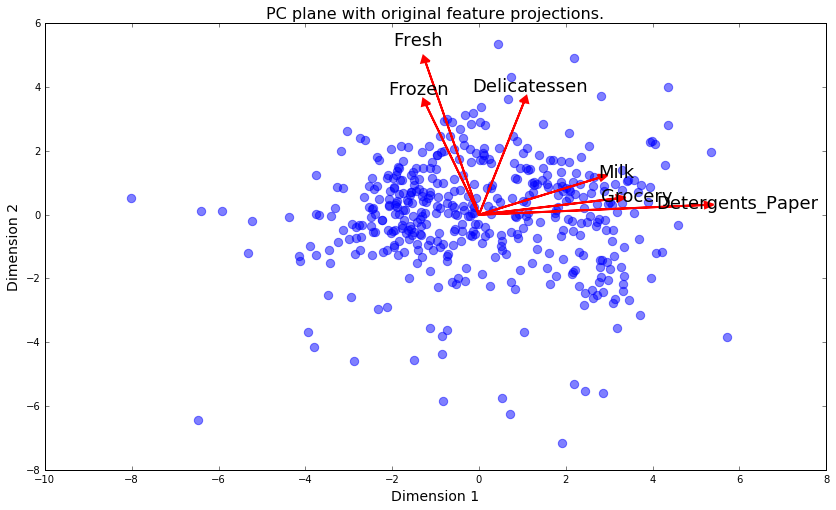

In [73]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** Advantages of K-means include it's simplicity. Given a number of k cluster centers, the algorithm will loop through a series of steps assigning datapoints to the nearest cluster center, and then optimizing the location of each cluster center.  

The main advantage of the Gaussian mixture model is that it is a form of soft clustering. This means that datapoints can be considered to be a part of more than one cluster. It assumes that the data comes from a defined number of gaussian distributions. Each distribution can then define a probability to each datapoint corresponding to how likely that distrubtion would generate that datapoint.

I will be using a Gaussian Mixture Model to identify customer segments. Below are the two main reasons for my choice:

1) Basd on my earlier observations regarding the scatter matricies, and descriptive statistics  it seems that the relationships between the original features is fairly complex. Most of the features even after scaling seemed to show atleast moderate correlations with other features. Although the first two principal components seem to be heavily weighted by different sets of features the presence of several outliers can definitely be influencing the directions of maximal variance in the data (which would be corresponding to the directions of the principal components). Since there is uncertainty in the correct directions of maximal variance I cannot have enough trust in the Biplot in order to go with a hard clustering. Especially when it seems that the two clusters are not well separated (see point 2 below). 

2) Looking at the Biplot to mee it seems that their are two clusters centered around (-2,0) and (3,0). This is just based on my own visual inspection. However there are a large number of points of points around what I would consider dividing area (if thinking of K means with K = 2) of these two clusters around 0 and 0.5 on the axis of Dimmension 1. This makes me think that K-means could potentially misassign these datapoints especially if the initial conditions of the algorithim are not ideal.

Due to the above uncertainties I think it would be more conservative to use a Gaussian Model. Especially if it would be worthwhile for the wholesale distributor to look into creating  specific services for these borderline customers.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [74]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorthm of choice to the reduced data 
clusterer = GMM(n_components=3,n_iter=100,n_init=10,random_state=0)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print score

0.374950420114


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

2 Clusters: 0.322883712987
3 Clusters: 0.374950420114
4 Clusters: 0.321144751537
5 Clusters: 0.258586585533

Using 3 clusters gave the most similar clusters. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

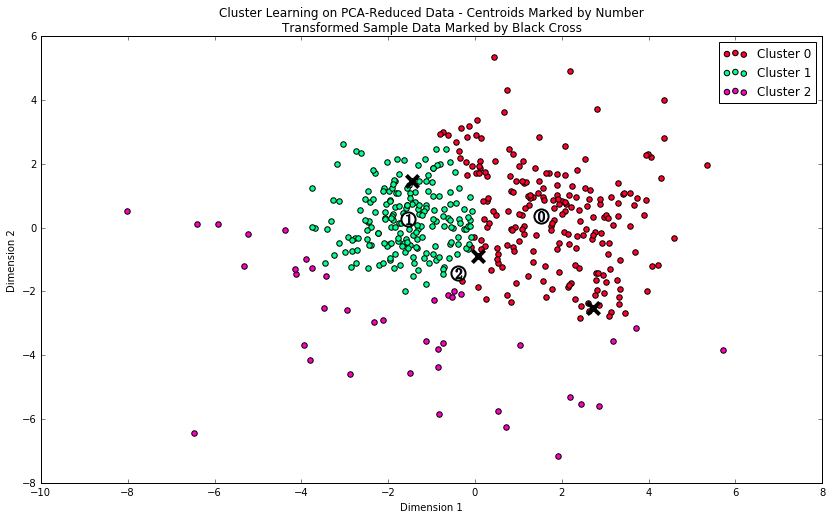

In [75]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [76]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6063.0,6563.0,9563.0,1358.0,2828.0,1188.0
Segment 1,9826.0,1912.0,2347.0,2224.0,286.0,722.0
Segment 2,2490.0,2273.0,3498.0,785.0,625.0,361.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 
Note: By Segment # I am referring to the cluster center points above. (Means in my case of using Gaussian Mixture Model) 

Segment 0: Spends below mean and median on Fresh items, but above mean and median on Grocery and Milk items. While spending within the Q1 and Q3 percentiles on the other three categories. This type distributed spending across categories may resemble that of a retailer.

Segment 1: Spends between median and Q3 on Fresh items, between Q1 and median on MIlk items, close to Q1 on Grocery items,between median and Q3 Frozen,close to Q1 on Detergents_Paper, and between Q1 and median on Delicatessen items. This spending seems to be something like a restaurant due to high spending on fresh and frozen items. It is most likely not a large retailer since in most categories the spending is lower than mean spending. 

Segment 2 spends below mean and Q1 on Delicatessen items, below mean and between Q1 and median on Detergents_paper, below mean and close to Q1 on Frozen items, below mean and between Q1 and median on Grocery and Milk items, and below mean and Q1 on Fresh items. Although this cluster center tends to spend low across all categories, most spending is on Grocery, Fresh, and Milk products. Looks like this customer would be something like a small market or convenience store. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [77]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** Sample 0: Due to the above median Grocery and Detergents_Paper spending it seems that this sample should belong to cluster 0. This is because most points with a high projection in dimmension 1 (mostly weighted by milk, grocery, and Detergents_Paper spending) look to be within cluster 0 on the biplot.

Sample 1: This persons spending resembles Segment 1 mean's spending with the exception that the sample point has a much larger frozen spending. However this spending on frozen items in both cases was still in the upper 50 percentile of spending within the dataset. Also the spending indicates a higher projection in dimmension 2 than in dimmension 1 based on the samples higher spending on Fresh, Frozen, and Delicatessen goods. I think this sample should belong to cluster 1.

Sample 2: Most of this samples spending is on Fresh, Milk, and Grocery items. Based on this I would associate it with Cluster 0. I would expect this datapoint to be somewhat in the center of the biplot do to the generally lower spending in each category compared with the datasets statistics. However due to the larger portion of spending on Milk and Grocery items I would consider it be a parrt of Cluster 0 rather than Cluster 2.  

The predictions were consistent to my intuition for all three samples. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** I would not assume that the change would affect all customers equally. This is because different customer segments spend differently on the 6 categories. For example a restaurant segment may be constantly in need a product that has a short shelf life. Wheras a retailer may be selling paper products that can be held in inventory for longer periods of time. 

An A/B Test could be used to determine if a particular customer segment reacts positively to the delivery change. The following would be done for each customer segment to conduct the necessary tests:

1) Conduct a power analysis to determine the sample size needed to find a particular effect for a given set of error rates. The A/B test would be a one directional test to determine if there was an improvement in something like a customer satisfaction score on a numerical scale from 0-10 regarding the distributor's delivery service. The null hypothesis would be that there is no difference in mean ratings, and the alternative hypothesis would be that the new delivery service has a higher mean satisfaction rating. 
2) Assign half the sample to the 5 day delivery condition (control). The other half assign the sample to a 3 day delivery condition. 
3) After 3 weeks or whatever the wholesale distributor thinks is appropriate ask each study participant to rate their satisfaction with the delivery service on the same numerical scale
4) Calculate the appropriate statistic, convert it to a probability, and compare results to a particular significance threshold probability. If the probabillity of obtaining your results is less than the significance threshold reject your null hypothesis that there is no difference between the old and new delivery service. 

To see which segment was impacted the most the distributor could compare effect sizes between the different tests for each segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

A supervised classification model could be used to classify the new customers into one of the three particular segments (This would be the target variable).

The classification problem would be tackled by the following:

1) Choose an appropriate classifier for the given problem. 
2) Split the old customer data into training and testing sets. Fit the classifier on the training set. 
3) Cross validate the chosen classifier using the testing set. Use Grid Search if more complex optimization is needed to meet classification performance requirements. 
3) Once performance on the above testing set is acceptable. We can use the model to classify the ten new customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

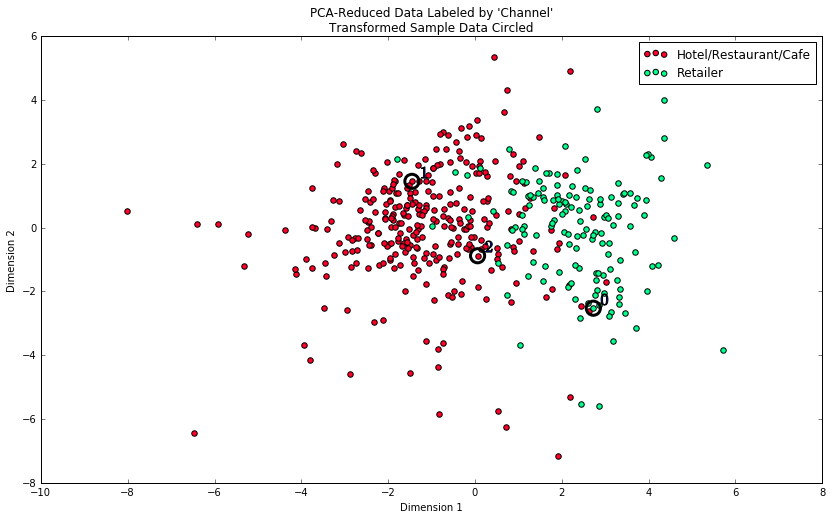

In [78]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

My clustering resulted in 3 clusters versus the 2 labels in the underlying distribution. The above visualization is in agreement my initial guess that there were two main clusters (Discussed in Question 8). However my clustering results define a 3rd cluster which consists of most datapoints around the bottom half of the biplot. These points are further away form most of the data set, and have fewer neighbors. This third cluster consisted of datapoints categorized as both HoReCa and Retailer. The underlying distribution labels could vary from the number of clusters I found optimal based on how these labels were collected or allocated. The third cluster may represent something like specialty retailers or HoReCa that may want to identify as the Channel labels, but have differing spending habits than most of the vendors in there respective markets.

In addition near the 0 mark on Dimmension 1 there are some datapoints that are labeled opposite to what their neighbors are labeled. This is also in agreement with my observation that since these two groups do not have a distinctive separation it may be more appropriate to use a soft clustering technique such as the Gaussian Mixture Model. 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.